In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/sumedh1507/bmw-car-sales-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohamedismail11
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sumedh1507/bmw-car-sales-dataset


100%|██████████| 828k/828k [00:00<00:00, 877MB/s]

In [ ]:
import os

os.listdir('./bmw-car-sales-dataset')

['BMW_Car_Sales_Classification.csv']

In [ ]:
df = pd.read_csv('./bmw-car-sales-dataset/BMW_Car_Sales_Classification.csv')
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [ ]:
df.isna().sum()

,0
Model,0
Year,0
Region,0
Color,0
Fuel_Type,0
Transmission,0
Engine_Size_L,0
Mileage_KM,0
Price_USD,0
Sales_Volume,0


In [ ]:
df.duplicated().sum()

np.int64(0)

eda


In [ ]:
df.columns

Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume',
       'Sales_Classification'],
      dtype='object')

In [ ]:
df.Model.mode()

,Model
0,7 Series


In [ ]:
model_counts = df.Model.value_counts()
model_counts

,count
Model,
7 Series,4666
i3,4618
i8,4606
3 Series,4595
5 Series,4592
X1,4570
X3,4497
X5,4487
M5,4478


In [ ]:
list_ = model_counts.index.to_list()

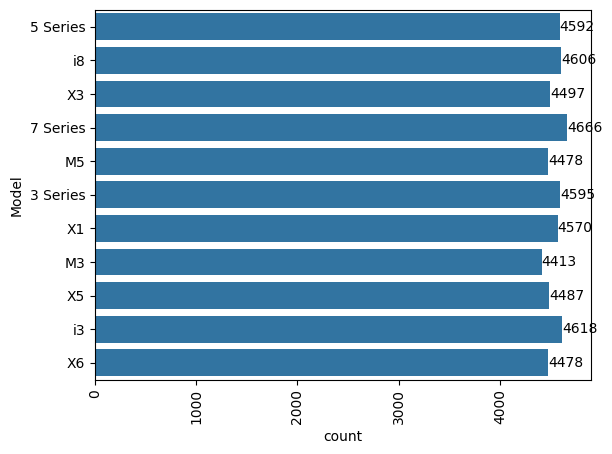

In [ ]:
ax = sns.countplot(df.Model)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

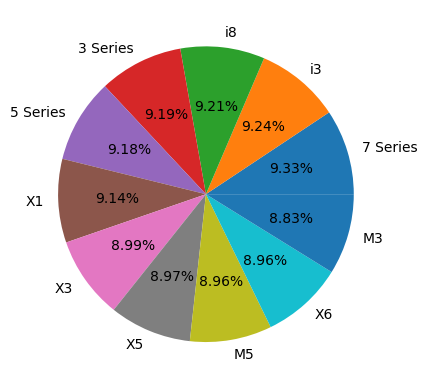

In [ ]:
plt.pie(model_counts, autopct='%1.2f%%', labels=list_)
plt.show()

In [ ]:
df.Year.describe()

,Year
count,50000.000000
mean,2017.015700
std,4.324459
min,2010.000000
25%,2013.000000
50%,2017.000000
75%,2021.000000
max,2024.000000


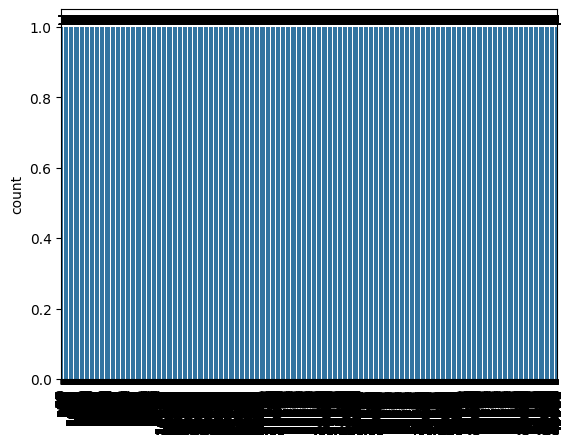

In [ ]:
ax = sns.countplot(df.Year)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

In [19]:
df.columns

Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume',
       'Sales_Classification'],
      dtype='object')

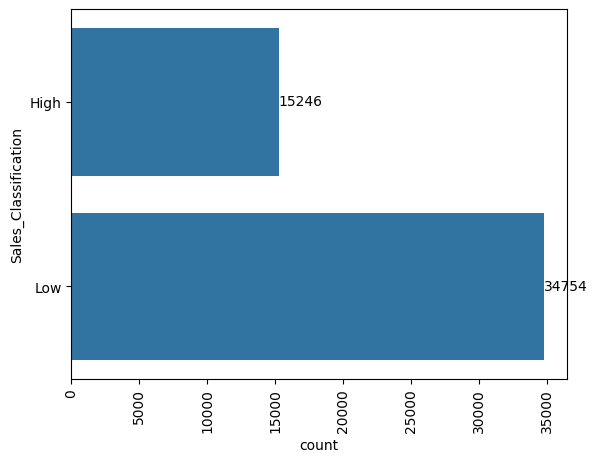

In [20]:
ax = sns.countplot(df.Sales_Classification)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

In [21]:
df.Price_USD.describe()

,Price_USD
count,50000.000000
mean,75034.600900
std,25998.248882
min,30000.000000
25%,52434.750000
50%,75011.500000
75%,97628.250000
max,119998.000000


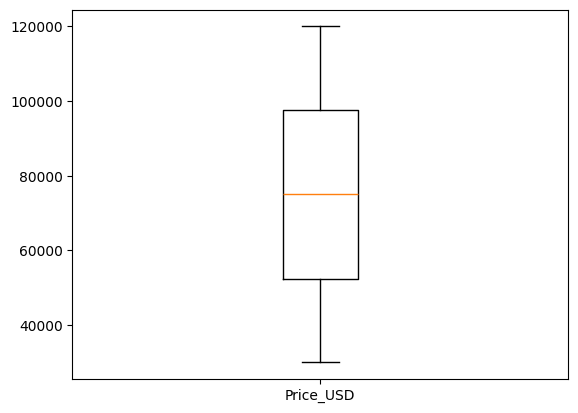

In [22]:
plt.boxplot(df.Price_USD)
plt.xticks([1], ["Price_USD"])
plt.show()

Preprocessing

In [23]:
df_categorical = df.select_dtypes("object")
df_numeric = df.select_dtypes("number")

In [24]:
df_categorical

,Model,Region,Color,Fuel_Type,Transmission,Sales_Classification
0,5 Series,Asia,Red,Petrol,Manual,High
1,i8,North America,Red,Hybrid,Automatic,Low
2,5 Series,North America,Blue,Petrol,Automatic,Low
3,X3,Middle East,Blue,Petrol,Automatic,Low
4,7 Series,South America,Black,Diesel,Manual,Low
...,...,...,...,...,...,...
49995,i3,Asia,Red,Hybrid,Manual,High
49996,i3,Middle East,Silver,Electric,Manual,High
49997,5 Series,Middle East,Red,Petrol,Automatic,High
49998,i3,Asia,White,Electric,Automatic,High


In [25]:
df_numeric

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
0,2016,3.5,151748,98740,8300
1,2013,1.6,121671,79219,3428
2,2022,4.5,10991,113265,6994
3,2024,1.7,27255,60971,4047
4,2020,2.1,122131,49898,3080
...,...,...,...,...,...
49995,2014,4.6,151030,42932,8182
49996,2023,4.2,147396,48714,9816
49997,2010,4.5,174939,46126,8280
49998,2020,3.8,3379,58566,9486


In [26]:
df_categorical['Year'] = df['Year']

In [27]:
df_categorical['Year'] = df_categorical['Year'].astype(np.object_)

In [28]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Model                 50000 non-null  object
 1   Region                50000 non-null  object
 2   Color                 50000 non-null  object
 3   Fuel_Type             50000 non-null  object
 4   Transmission          50000 non-null  object
 5   Sales_Classification  50000 non-null  object
 6   Year                  50000 non-null  object
dtypes: object(7)
memory usage: 2.7+ MB


In [29]:
df_numeric.drop('Year', axis=1, inplace=True)

In [30]:
df_numeric

,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
0,3.5,151748,98740,8300
1,1.6,121671,79219,3428
2,4.5,10991,113265,6994
3,1.7,27255,60971,4047
4,2.1,122131,49898,3080
...,...,...,...,...
49995,4.6,151030,42932,8182
49996,4.2,147396,48714,9816
49997,4.5,174939,46126,8280
49998,3.8,3379,58566,9486


In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [32]:
cols = df_categorical.columns.to_list()
cols

['Model',
 'Region',
 'Color',
 'Fuel_Type',
 'Transmission',
 'Sales_Classification',
 'Year']

In [33]:
le = LabelEncoder()
for col in cols:
    df_categorical[col] = le.fit_transform(df_categorical[col])

In [34]:
df_categorical

,Model,Region,Color,Fuel_Type,Transmission,Sales_Classification,Year
0,1,1,3,3,1,0,6
1,10,4,3,2,0,1,3
2,1,4,1,3,0,1,12
3,6,3,1,3,0,1,14
4,2,5,0,0,1,1,10
...,...,...,...,...,...,...,...
49995,9,1,3,2,1,0,4
49996,9,3,4,1,1,0,13
49997,1,3,3,3,0,0,0
49998,9,1,5,1,0,0,10


In [35]:
df_categorical.Year.nunique()

15

In [36]:
df_categorical.Year.unique()

array([ 6,  3, 12, 14, 10,  7,  4,  9,  2,  5,  1, 11, 13,  0,  8])

In [37]:
cols_numeric = df_numeric.columns.to_list()
cols_numeric

['Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']

In [38]:
scaler = StandardScaler()
for col in cols_numeric:
    df_numeric[[col]] = scaler.fit_transform(df_numeric[[col]])

In [39]:
df_numeric

,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
0,0.250548,0.887814,0.911817,1.131530
1,-1.632377,0.368717,0.160951,-0.573911
2,1.241561,-1.541504,1.470514,0.674365
3,-1.533276,-1.260805,-0.540950,-0.357231
4,-1.136871,0.376656,-0.966867,-0.695729
...,...,...,...,...
49995,1.340662,0.875423,-1.234811,1.090224
49996,0.944257,0.812704,-1.012409,1.662205
49997,1.241561,1.288067,-1.111955,1.124529
49998,0.547852,-1.672880,-0.633457,1.546689


In [40]:
df_categorical

,Model,Region,Color,Fuel_Type,Transmission,Sales_Classification,Year
0,1,1,3,3,1,0,6
1,10,4,3,2,0,1,3
2,1,4,1,3,0,1,12
3,6,3,1,3,0,1,14
4,2,5,0,0,1,1,10
...,...,...,...,...,...,...,...
49995,9,1,3,2,1,0,4
49996,9,3,4,1,1,0,13
49997,1,3,3,3,0,0,0
49998,9,1,5,1,0,0,10


In [41]:
df_numeric

,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
0,0.250548,0.887814,0.911817,1.131530
1,-1.632377,0.368717,0.160951,-0.573911
2,1.241561,-1.541504,1.470514,0.674365
3,-1.533276,-1.260805,-0.540950,-0.357231
4,-1.136871,0.376656,-0.966867,-0.695729
...,...,...,...,...
49995,1.340662,0.875423,-1.234811,1.090224
49996,0.944257,0.812704,-1.012409,1.662205
49997,1.241561,1.288067,-1.111955,1.124529
49998,0.547852,-1.672880,-0.633457,1.546689


In [42]:
df_new = pd.concat([df_categorical, df_numeric], axis=1)
df_new

,Model,Region,Color,Fuel_Type,Transmission,Sales_Classification,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
0,1,1,3,3,1,0,6,0.250548,0.887814,0.911817,1.131530
1,10,4,3,2,0,1,3,-1.632377,0.368717,0.160951,-0.573911
2,1,4,1,3,0,1,12,1.241561,-1.541504,1.470514,0.674365
3,6,3,1,3,0,1,14,-1.533276,-1.260805,-0.540950,-0.357231
4,2,5,0,0,1,1,10,-1.136871,0.376656,-0.966867,-0.695729
...,...,...,...,...,...,...,...,...,...,...,...
49995,9,1,3,2,1,0,4,1.340662,0.875423,-1.234811,1.090224
49996,9,3,4,1,1,0,13,0.944257,0.812704,-1.012409,1.662205
49997,1,3,3,3,0,0,0,1.241561,1.288067,-1.111955,1.124529
49998,9,1,5,1,0,0,10,0.547852,-1.672880,-0.633457,1.546689


In [43]:
df_new.corr()

,Model,Region,Color,Fuel_Type,Transmission,Sales_Classification,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
Model,1.000000,0.000263,-0.008895,0.001258,0.003901,0.002304,-0.003107,-0.001271,-0.009262,-0.006762,-0.001374
Region,0.000263,1.000000,0.007506,-0.001513,0.005953,0.001045,0.003098,0.001501,-0.000075,-0.002456,-0.000716
Color,-0.008895,0.007506,1.000000,-0.005043,-0.001299,-0.005216,-0.005910,0.007271,-0.006765,0.001548,0.006089
Fuel_Type,0.001258,-0.001513,-0.005043,1.000000,0.001249,0.001583,0.000236,0.003974,-0.007535,-0.003228,-0.004218
Transmission,0.003901,0.005953,-0.001299,0.001249,1.000000,0.001647,0.005116,0.001357,-0.013476,-0.005230,-0.001487
Sales_Classification,0.002304,0.001045,-0.005216,0.001583,0.001647,1.000000,-0.005391,0.001796,-0.006580,0.001727,-0.795238
Year,-0.003107,0.003098,-0.005910,0.000236,0.005116,-0.005391,1.000000,-0.001944,0.008741,0.003547,0.001671
Engine_Size_L,-0.001271,0.001501,0.007271,0.003974,0.001357,0.001796,-0.001944,1.000000,-0.004906,0.000146,-0.003942
Mileage_KM,-0.009262,-0.000075,-0.006765,-0.007535,-0.013476,-0.006580,0.008741,-0.004906,1.000000,-0.004238,0.001434
Price_USD,-0.006762,-0.002456,0.001548,-0.003228,-0.005230,0.001727,0.003547,0.000146,-0.004238,1.000000,0.000080


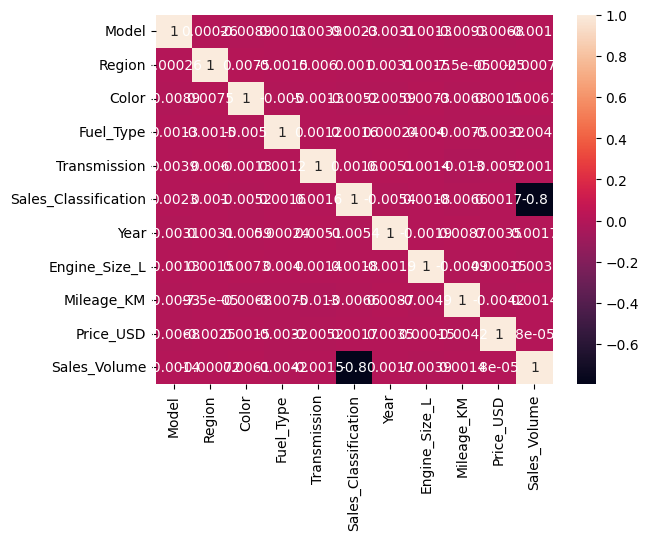

In [44]:
sns.heatmap(df_new.corr(), annot=True)
plt.show()

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = df_new.drop('Price_USD', axis=1)
y = df_new['Price_USD']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40000, 10), (10000, 10), (40000,), (10000,))

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
model.score(X_test, y_test)

-0.0007545978281613408

In [51]:
model.score(X_train, y_train)

0.00028280695689786306

In [52]:
from xgboost import XGBRegressor
model = XGBRegressor(max_depth=5, n_estimators=200)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [53]:
model.score(X_train, y_train)

0.22550566230937819

In [54]:
model.score(X_test, y_test)

-0.05023117007621014